# Исследование и прогнозирование оттока клиентов банка

## **Цель**:
Разработать модель машинного обучения для прогнозирования оттока клиентов банка на основе их характеристик, чтобы помочь бизнесу снизить потери и улучшить стратегии удержания клиентов.

---
## **Описание проекта**
1. **EDA (Exploratory Data Analysis):**
   - Анализ данных клиентов банка для выявления ключевых факторов, влияющих на отток.
   - Визуализация распределений, корреляций и аномалий в данных.
2. **Прогнозирование оттока:**
   - Построение и сравнение классических моделей машинного обучения (логистическая регрессия, случайный лес, градиентный бустинг и др.).
   - Оптимизация гиперпараметров и оценка качества моделей с учетом дисбаланса классов.

Источник данных:
https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset?resource=download

---

## **Вопросы по EDA**
1. **Распределение клиентов:**
   - Как распределены клиенты по странам, полу и возрасту? Есть ли дисбаланс?
   - Сколько клиентов ушло (churn=1) vs осталось (churn=0)?

2. **Финансовые показатели:**
   - Как баланс на счете (balance) связан с оттоком? Есть ли разница в балансах между ушедшими и оставшимися клиентами?
   - Влияет ли кредитный рейтинг (credit_score) на вероятность оттока?
   - Есть ли связь между зарплатой (estimated_salary) и оттоком?

3. **Продукты и активность:**
   - Как количество продуктов (products_number) влияет на отток?
   - Чаще ли уходят клиенты без кредитной карты (credit_card=0)?
   - Как активность клиента (active_member) связана с оттоком?

4. **Демография и поведение:**
   - Есть ли зависимость между возрастом (age) и оттоком?
   - Как срок сотрудничества с банком (tenure) влияет на вероятность ухода?

5. **Корреляции и взаимодействия:**
   - Есть ли связь между страной (country) и оттоком?
   - Какие признаки наиболее сильно коррелируют с оттоком?

6. **Корреляция сложных признаков с оттоком клиентов:**
   - Подобрать сложные признаки (отношения признаков) и изучить их корреляцию с оттоком клиентов.

---

## **Вопросы по прогнозированию**
1. **Подготовка данных:**
   - Как кодировать категориальные признаки (country, gender)?
   - Нужно ли масштабировать числовые признаки (age, balance)?

2. **Борьба с дисбалансом:**
   - Какой метод лучше: oversampling (SMOTE), undersampling или веса классов?
   - Какие метрики (F1, ROC-AUC) использовать для оценки качества?

3. **Выбор модели:**
   - Какая модель (логистическая регрессия, случайный лес, XGBoost) дает лучший результат?
   - Как сравнить важность признаков в разных моделях?

4. **Оптимизация:**
   - Какие гиперпараметры (глубина деревьев, learning rate) улучшают качество?
   - Как использовать кросс-валидацию для оценки устойчивости модели?

5. **Оценка:**
   - Какая модель лучше работает на тестовой выборке: точность vs полнота?
   - Как интерпретировать матрицу ошибок для бизнеса?

6. **Деплоймент:**
   - Какие признаки наиболее критичны для прогноза?
   - Можно ли упростить модель без потери качества?

!!! Обязательно в конце вставить пару информативных графиков от plotly: https://plotly.com/python/ml-regression/

---
## **Описание полей таблицы**

1. **customer_id** (Идентификатор клиента)
   - Уникальный идентификатор клиента в системе банка.

2. **credit_score** (Кредитный рейтинг)
   - Числовой показатель, отражающий кредитоспособность клиента (чем выше, тем лучше).

3. **country** (Страна)
   - Страна проживания клиента (например, Германия, Франция, Испания).

4. **gender** (Пол)
   - Пол клиента (мужчина/женщина).

5. **age** (Возраст)
   - Возраст клиента в годах.

6. **tenure** (Срок сотрудничества)
   - Количество лет, в течение которых клиент пользуется услугами банка.

7. **balance** (Баланс на счете)
   - Сумма денег на счете клиента.

8. **products_number** (Количество продуктов)
   - Количество банковских продуктов, которыми пользуется клиент (например, депозит, кредит, ипотека).

9. **credit_card** (Наличие кредитной карты)
   - Бинарный признак: 1 — у клиента есть кредитная карта, 0 — нет.

10. **active_member** (Активный клиент)
    - Бинарный признак: 1 — клиент активно пользуется услугами банка, 0 — неактивен.

11. **estimated_salary** (Предполагаемая зарплата)
    - Оценка годового дохода клиента.

12. **churn** (Отток)
    - Целевая переменная: 1 — клиент ушел из банка, 0 — клиент остался.

Импортируем библиотеки:

In [826]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.offline as pyo
import plotly.io as pio

# Устанавливаем рендерер по умолчанию на "png" (статический)
pio.renderers.default = "png"

Чтение данных и определение функции для диагностики df:

In [827]:
# чтение
df = pd.read_csv('data\\bank_customer.csv', sep = ',')

# определение функции
def df_diagnostics(df1, target_col=None, iqr_coefficient=1.5):
    # Собираем основные характеристики столбцов
    diag = pd.DataFrame({
        'dtypes': df1.dtypes,
        'count': df1.count(),
        'unique': df1.nunique(),
        'nan_count': df1.isnull().sum(),
        'nan_%': df1.isnull().sum() / df1.shape[0] * 100})

    # Словарь описывающий, какую функцию применить для каждой метрики
    metrics = {
        'mean': lambda s: s.mean(),
        'median': lambda s: s.median(),
        'mode': lambda s: s.mode().iloc[0] if not s.mode().empty else np.nan,
        'std': lambda s: s.std(),
        'min': lambda s: s.min(),
        '25%': lambda s: s.quantile(0.25), # 25% квартиль
        '50%': lambda s: s.quantile(0.50), # 50% квартиль (медиана)
        '75%': lambda s: s.quantile(0.75), # 75% квартиль
        'max': lambda s: s.max()}

    # Вычисляем метрики только для числовых столбцов
    numeric_cols = df1.select_dtypes(include=[np.number]).columns
    for metric, func in metrics.items():
        diag[metric] = [func(df1[col]) if col in numeric_cols else np.nan
                        for col in df1.columns]

    # Подсчёт количества выбросов с регулируемым коэффициентом IQR
    def count_outliers_iqr(col, iqr_coef=iqr_coefficient):
        if pd.api.types.is_numeric_dtype(col) and not pd.api.types.is_bool_dtype(col):
            Q1 = col.quantile(0.25)
            Q3 = col.quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - iqr_coef * IQR
            upper_bound = Q3 + iqr_coef * IQR
            return ((col < lower_bound) | (col > upper_bound)).sum()
        else:
            return np.nan

    # Применяем функцию count_outliers_iqr только к числовым столбцам
    diag['outliers_count'] = [
        count_outliers_iqr(df1[col]) if pd.api.types.is_numeric_dtype(df1[col]) and not pd.api.types.is_bool_dtype(df1[col]) else np.nan
        for col in df1.columns]

    # Количество строк с пропущенными значениями в целевой переменной (если она указана)
    if target_col is not None:
        rows_with_nan_target = df1[target_col].isnull().sum()
        diag['rows_nan_target'] = [rows_with_nan_target] * len(df1.columns)

    # Добавляем корреляцию с целевой переменной (если она указана)
    if target_col is not None and pd.api.types.is_numeric_dtype(df1[target_col]):
        diag['corr_with_target'] = [df1[col].corr(df1[target_col]) if pd.api.types.is_numeric_dtype(df1[col]) else np.nan
                                      for col in df1.columns]

    # Вычисляем количество дублирующих строк в df
    duplicates_count = df1.duplicated().sum()
    print("Количество дублирующих строк:", duplicates_count,
          f"\nOutliers_count: Выбросы в данных более IQR * {iqr_coefficient}")

    # Возвращаем df с градиентной подсветкой, форматированием и округлением чисел
    return (diag.style.background_gradient(cmap='Set3', low=0.1, high=0.01)
            .format("{:.2f}", subset=diag.select_dtypes(include=[np.number]).columns))

---
# Обзор таблиц


In [828]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Информация о таблицах

In [829]:
df_diagnostics(df)

Количество дублирующих строк: 0 
Outliers_count: Выбросы в данных более IQR * 1.5


,dtypes,count,unique,nan_count,nan_%,mean,median,mode,std,min,25%,50%,75%,max,outliers_count
customer_id,int64,10000.00,10000.00,0.00,0.00,15690940.57,15690738.00,15565701.00,71936.19,15565701.00,15628528.25,15690738.00,15753233.75,15815690.00,0.00
credit_score,int64,10000.00,460.00,0.00,0.00,650.53,652.00,850.00,96.65,350.00,584.00,652.00,718.00,850.00,15.00
country,object,10000.00,3.00,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
gender,object,10000.00,2.00,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
age,int64,10000.00,70.00,0.00,0.00,38.92,37.00,37.00,10.49,18.00,32.00,37.00,44.00,92.00,359.00
tenure,int64,10000.00,11.00,0.00,0.00,5.01,5.00,2.00,2.89,0.00,3.00,5.00,7.00,10.00,0.00
balance,float64,10000.00,6382.00,0.00,0.00,76485.89,97198.54,0.00,62397.41,0.00,0.00,97198.54,127644.24,250898.09,0.00
products_number,int64,10000.00,4.00,0.00,0.00,1.53,1.00,1.00,0.58,1.00,1.00,1.00,2.00,4.00,60.00
credit_card,int64,10000.00,2.00,0.00,0.00,0.71,1.00,1.00,0.46,0.00,0.00,1.00,1.00,1.00,0.00
active_member,int64,10000.00,2.00,0.00,0.00,0.52,1.00,1.00,0.50,0.00,0.00,1.00,1.00,1.00,0.00


Анализ информации о таблице показал, что:
- клиенты банка по полю `customer_id` все уникальные
- имена полей корректные
- типы данных в полях корректны
- в каждом поле по 10 000 значений, пропусков нет
- в некоторых полях есть выбросы при расчёте по методу IQR * 1.5

Построим гистограммы распределений всех числовых полей:

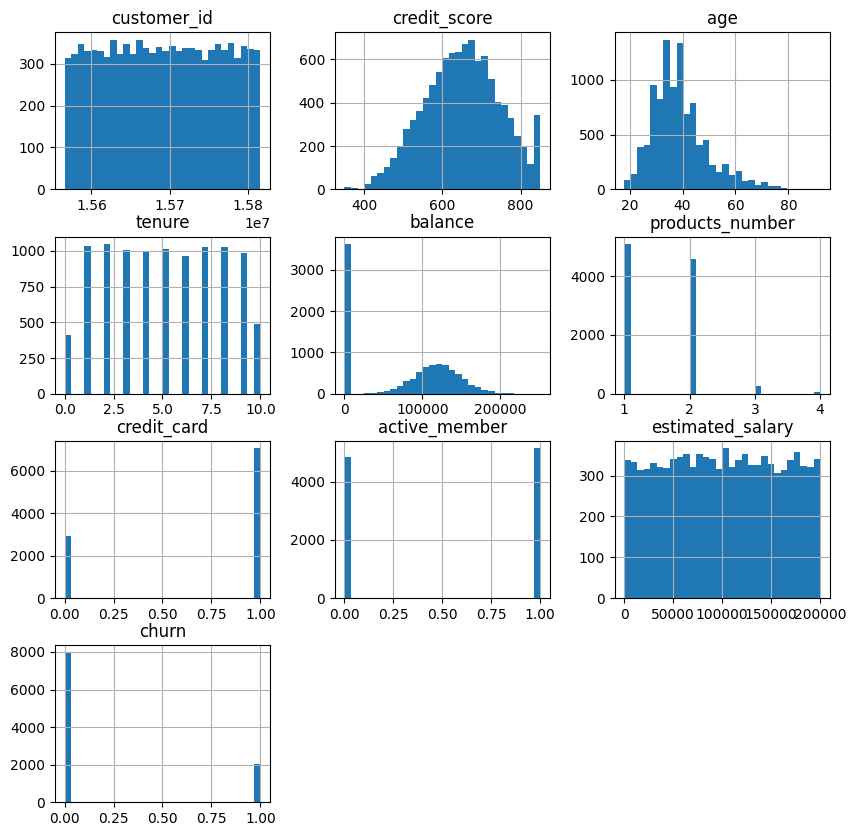

In [830]:
df.hist(bins=30, figsize=(10, 10))
plt.show()

---
# Предобработка данных

Для удобства дальнейшего анализа произведём следующие замены:
- для следующих полей с бинарным типом данных создадим доп поля с заменой значений 1 на "да" и 0 на "нет": credit_card, active_member, churn.
- в поле "gender" заменим "Male" на "Мужчины" и "Female" на "Женщины".
- переименуем названия стран.

In [831]:
# замена в поле credit_card
df['credit_card_str'] = df['credit_card'].replace({1: 'Да', 0: 'Нет'})

# замена в поле active_member
df['active_member_str'] = df['active_member'].replace({1: 'Да', 0: 'Нет'})

# замена в поле churn
df['churn_str'] = df['churn'].replace({1: 'Да', 0: 'Нет'})

# замена в поле gender
df['gender'] = df['gender'].replace({'Male': 'Мужчины', 'Female': 'Женщины'})

# замена в поле country
df['country'] = df['country'].replace({'France': 'Франция', 'Germany': 'Германия', 'Spain': 'Испания'})

`Вывод предобработки:` Для удобства дальнейшего анализа были произведены следующие замены:
- в полях credit_card, active_member, churn значения 1 заменены на "да" и значения 0 на "нет".
- в поле gender заменены значения: "Male" на "Мужчины" и "Female" на "Женщины".
- в поле country заменены значения: 'France': 'Франция', 'Germany': 'Германия', 'Spain': 'Испания'.

Определим функцию для построения гистограммы:

In [832]:
def plots_histogram(df, col_name, title, xaxis_title, yaxis_title, color=None, barmode='relative',
                    width=980, text_auto=False, marginal=None, labels=None, range_x=None, range_y=None):
    fig = px.histogram(df, x=col_name, color=color, title=title, marginal=marginal,
                       barmode=barmode, text_auto=text_auto, labels=labels, range_x=range_x, range_y=range_y)
    fig.update_layout(width=width, height=400, margin=dict(t=40, b=10, l=10, r=10),
                      xaxis_title=xaxis_title, yaxis_title=yaxis_title, bargap=0.1)
    pyo.iplot(fig)
    return None

Определим функцию для построения графика баров:

In [833]:
def plots_bar_pie(data, x_column_cat, xaxis_title, yaxis_title, title, single=False,
                  aggregation='count', y_column=None, y_range=False, round_labels=0,
                  size_plot=False):
    """Строит столбчатую и круговую диаграммы для категоризованных данных.
    :param data: DataFrame с данными.
    :param x_column_cat: Название столбца для категоризации.
    :param xaxis_title: Заголовок оси X.
    :param yaxis_title: Заголовок оси Y.
    :param title: Заголовок графика.
    :param single: Если True, строит только столбчатую диаграмму. По умолчанию False.
    :param aggregation: Функция агрегации ('count', 'sum', 'mean', 'median' и т.д.). По умолчанию 'count'.
    :param y_column: Название столбца для оси Y. Если не указан, используется количество значений.
    :param y_range: Диапазон значений для оси Y в виде списка [min, max]. По умолчанию False (автоматический диапазон).
    :param round_labels: Степень округления значений в подписях меток. По умолчанию 1.
    :param size_plot: Размер графика в виде списка [width, height]. По умолчанию False (используются стандартные размеры).
    """

    # Применение функции агрегации
    if y_column is None:
        # Если y_column не указан, используем количество значений
        category_counts = data[x_column_cat].value_counts().sort_index()
    else:
        # Если y_column указан, применяем агрегацию к указанному столбцу
        category_counts = data.groupby(x_column_cat, observed=False)[y_column].agg(aggregation)

    # Округление значений для подписей меток
    category_counts_rounded = category_counts.round(round_labels)

    # Создание subplot
    if single:
        fig = make_subplots(rows=1, cols=1, column_titles=[title,])
    else:
        fig = make_subplots(rows=1, cols=2, specs=[[{"type": "bar"}, {"type": "pie"}]],
                           horizontal_spacing=0, column_titles=[title, 'Круговая диаграмма'])

    # Добавление столбчатой диаграммы
    fig.add_trace(go.Bar(x=category_counts.index, y=category_counts.values,
                        text=category_counts_rounded.values, textposition='auto',
                        name='Удельный вес:'), row=1, col=1)

    # Добавление круговой диаграммы (если single=False)
    if not single:
        fig.add_trace(go.Pie(labels=category_counts.index, values=category_counts.values), row=1, col=2)

    # Настройка макета
    layout_kwargs = {
        'margin': dict(t=40, b=10, l=10, r=10),
        'xaxis_title': xaxis_title,
        'yaxis_title': yaxis_title}

    # Если передан size_plot, используем его для width и height
    if size_plot:
        layout_kwargs['width'] = size_plot[0]
        layout_kwargs['height'] = size_plot[1]
    else:
        # Иначе используем стандартные размеры
        layout_kwargs['width'] = 980 if not single else 600
        layout_kwargs['height'] = 400

    # Если передан y_range, добавляем его в настройки макета
    if y_range:
        layout_kwargs['yaxis'] = {'range': y_range}

    fig.update_layout(**layout_kwargs)
    pyo.iplot(fig)
    return None

Определим функцию для построения графика распределения scatter:

In [834]:
def plot_scatter(data, x_column, x_label, y_column, y_label, title, x_range=None, y_range=None,
                 color=None, marginal_x=None, marginal_y=None, color_palette='Turbo'):

    # Расчёт корреляции между x_column и y_column
    correlation = data[[x_column, y_column]].corr().iloc[0, 1]
    print(f"Коэффициент корреляции между '{x_label}' и '{y_label}' равен: {correlation:.2f}")

    fig = px.scatter(data, x=x_column, y=y_column, trendline="ols", opacity=0.2,
                     trendline_color_override='red', range_x=x_range, range_y=y_range,
                     marginal_x=marginal_x, marginal_y=marginal_y, title=title, color=color,
                     color_continuous_scale=color_palette)

    # Настройка макета
    fig.update_layout(width=800, height=400, margin=dict(t=40, b=10, l=10, r=10),
                      xaxis_title=x_label, yaxis_title=y_label)
    pyo.iplot(fig)

Определим функцию для выделения данных в df:

In [835]:
def highlight_cells(df, col_select=None, highl_counts=(1, 1), col_heatmap=None, cmap='RdYlGn',
                    num_rows=10, decimal_places=0):
    """В заданных полях в df подсвечиваем макс и мин значения и/или красим столбец в тепловую карту.
    :param df: DataFrame, в котором нужно выделить ячейки.
    :param col_select: Список столбцов, в которых необходимо выделить ячейки.
    :param highl_counts: Список из двух чисел, кол-во макс и мин ячеек для подсветки.
    :param col_heatmap: Список столбцов, для которых нужно применить тепловую карту (по умолчанию None).
    :param cmap: Цветовая палитра для тепловой карты (по умолчанию 'RdYlGn').
    :param num_rows: Количество первых строк для отображения (например 10).
    :param decimal_places: Количество знаков после запятой для числовых столбцов (по умолчанию 1).
    :return: DataFrame с примененными стилями."""

    # Если входной объект - Series, преобразуем его в DataFrame
    if isinstance(df, pd.Series):
        df = df.to_frame()

    # Ограничиваем DataFrame до num_rows строк
    df_subset = df.head(num_rows)

    # Функция для подсветки ячеек
    def apply_highlight(x):
        # Создаем DataFrame с пустыми строками
        result = pd.DataFrame('', index=x.index, columns=x.columns)

        # Проходим по каждому столбцу из списка col_select
        for col in col_select:
            # Подсветка максимальных значений
            max_indices = x[col].nlargest(highl_counts[0]).index
            result.loc[max_indices, col] = 'background-color: green'

            # Подсветка минимальных значений
            min_indices = x[col].nsmallest(highl_counts[1]).index
            result.loc[min_indices, col] = 'background-color: red'

        return result

    # Применение стилей к DataFrame
    styled_df = df_subset.style

    # Если указаны столбцы для выделения ячеек
    if col_select:
        styled_df = styled_df.apply(apply_highlight, axis=None)

    # Если указаны столбцы для тепловой карты, то карту применяем к каждому
    if col_heatmap:
        for col in col_heatmap:
            styled_df = styled_df.background_gradient(subset=[col], cmap=cmap,
                            vmin=df_subset[col].min(), vmax=df_subset[col].max())

    # Форматирование числовых столбцов
    format_str = f"{{:.{decimal_places}f}}"  # Формат для чисел
    styled_df = styled_df.format(format_str, subset=col_select if col_select else col_heatmap)  # Применяем формат к указанным столбцам

    return styled_df

---
# Исследование клиентов банка

## Распределения клиентов

Изучим как клиенты распределены по странам:

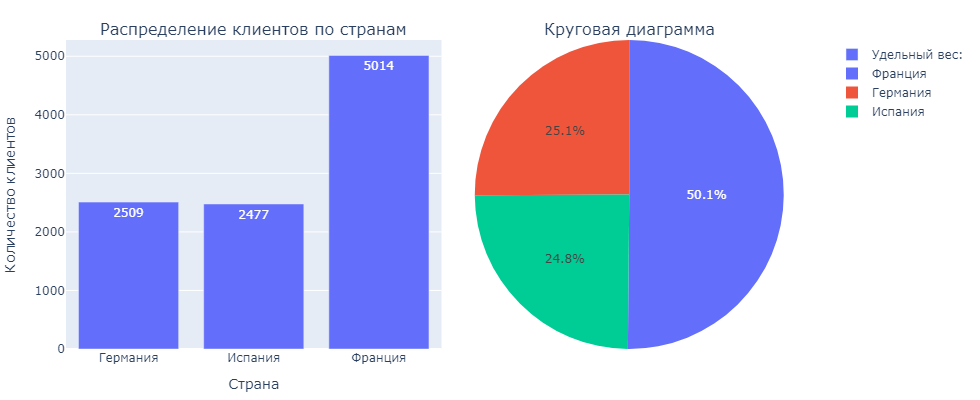

In [836]:
plots_bar_pie(df, 'country', "Страна", "Количество клиентов", 'Распределение клиентов по странам')

`Вывод:` 50.1% клиентов банка из Франции, 25.1% из Германии и 24.8% из Испании.

`! Проблема`: Идеально ровные доли клиентов в странах. Требуется обработка функцией для рандомизации стран по клиентам!

Изучим как клиенты распределены по полу:

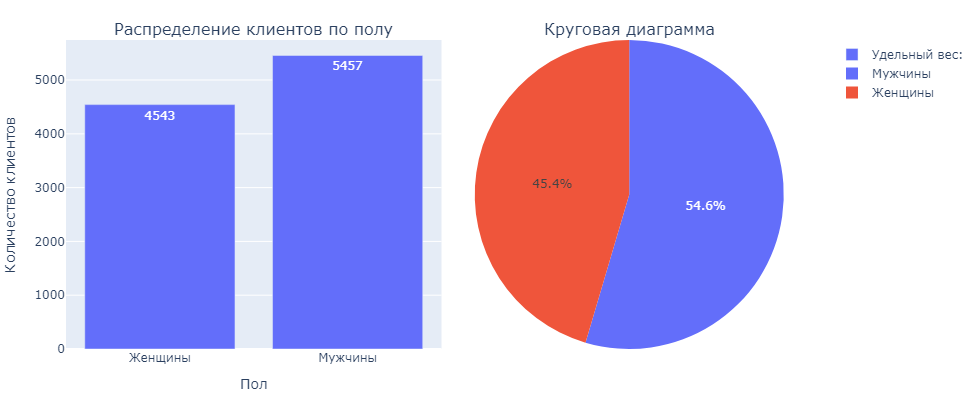

In [837]:
plots_bar_pie(df, 'gender', "Пол", "Количество клиентов", 'Распределение клиентов по полу')

`Вывод:` 54.6% клиентов это мужчины и 45.4% это женщины.

Изучим как клиенты распределены по возрасту:

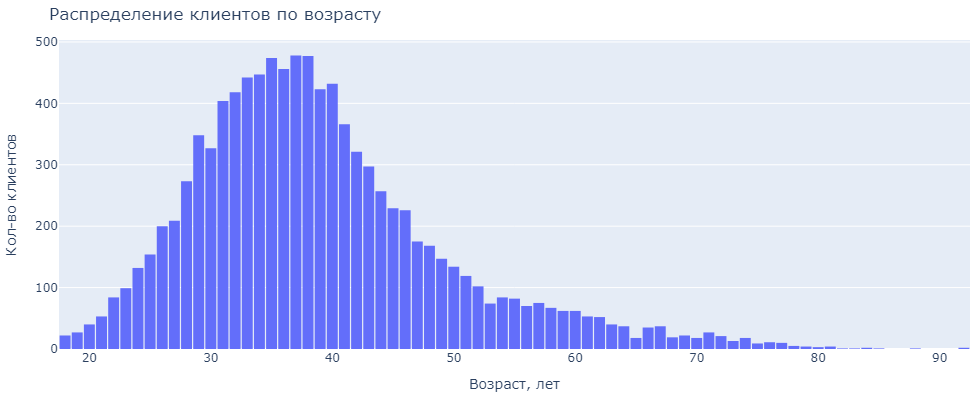

In [838]:
plots_histogram(df, "age", 'Распределение клиентов по возрасту',"Возраст, лет", "Кол-во клиентов")

`Вывод:` большая часть клиентов банка от 30 до 40-45 лет.

Изучим как возраст клиентов распределен с учётом пола:

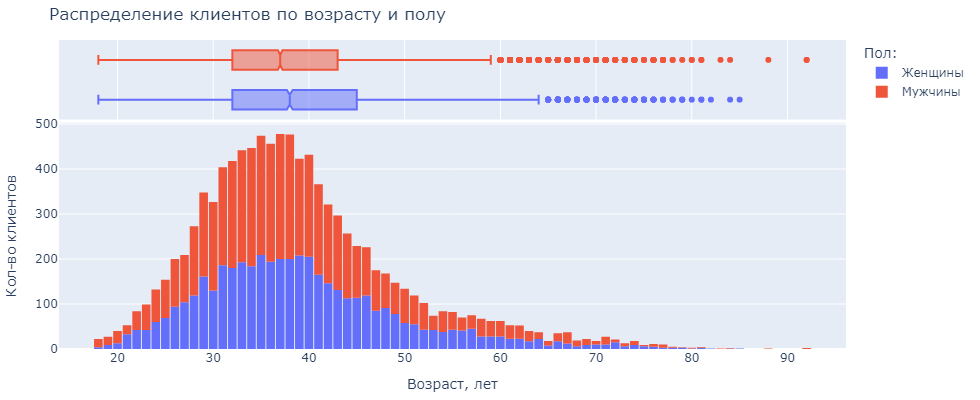

In [839]:
plots_histogram(df, "age", 'Распределение клиентов по возрасту и полу',"Возраст, лет", "Кол-во клиентов",
                color="gender", marginal="box", labels={'gender': 'Пол:'})

`Вывод:` возраст клиентов по полу распределён примерно одинаково. Можно выделить, что медианный возраст женщин немного выше.

Изучим как клиенты распределены по странам с учётом пола:

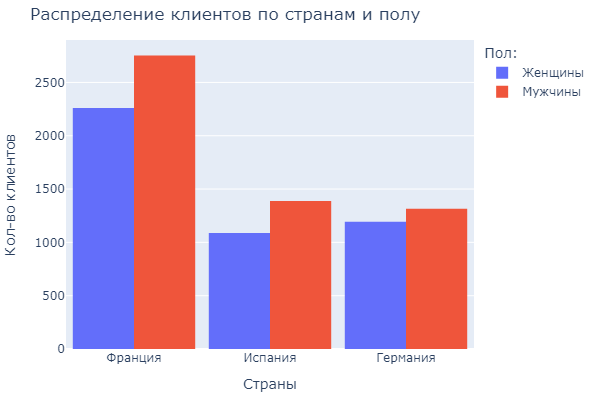

In [840]:
plots_histogram(df, "country", 'Распределение клиентов по странам и полу',"Страны", "Кол-во клиентов",
                color="gender", barmode="group", width=600, labels={'gender': 'Пол:'})

`Вывод:` в каждой стране клиентов мужчин в среднем больше.

Изучим сколько клиентов банка ушло и сколько ещё пользуется услугами банка:

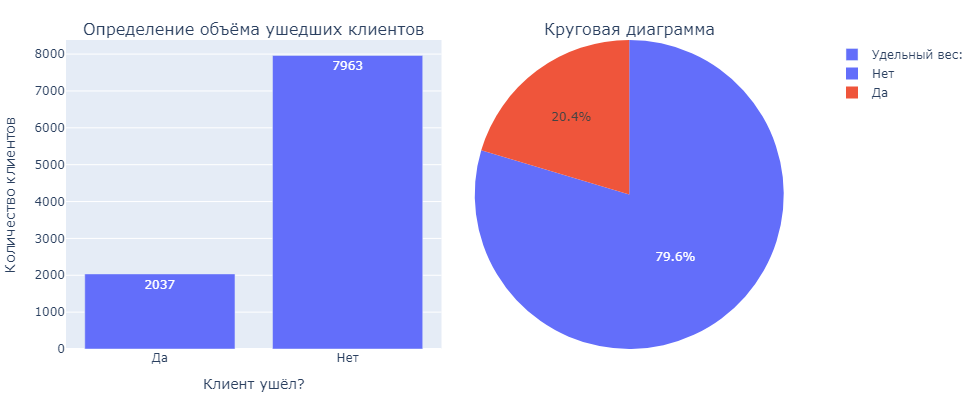

In [841]:
plots_bar_pie(df, 'churn_str', "Клиент ушёл?", "Количество клиентов", 'Определение объёма ушедших клиентов')

`Вывод:` из 100% клиентов, которые были когда-либо с банком 20.4% перестали пользоваться услугами банка.

---
## Финансовые показатели

Изучим как баланс на счёте связан с оттоком. Есть ли разница в балансах между ушедшими и оставшимися клиентами?

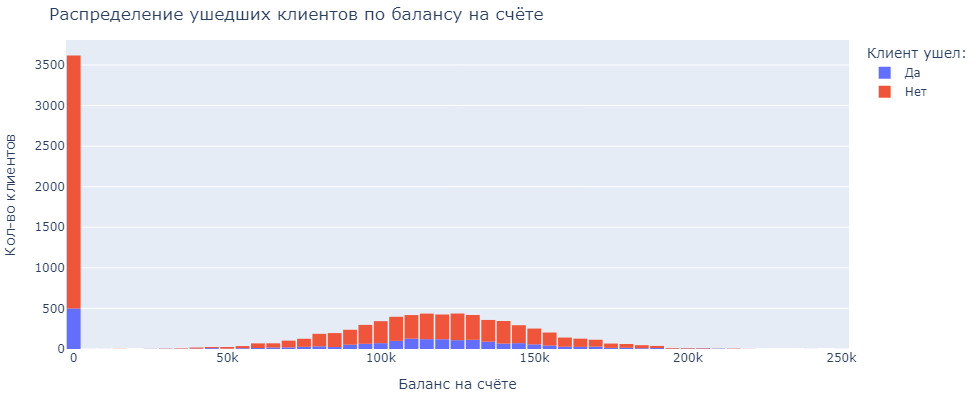

In [842]:
plots_histogram(df, "balance", 'Распределение ушедших клиентов по балансу на счёте',"Баланс на счёте", "Кол-во клиентов",
                color="churn_str", labels={'churn_str': 'Клиент ушел:'})

`Вывод:` обратим внимание на то, что есть много клиентов, которые работают с банком и у них на счёте баланс 0. Эти клиенты держат средства в другом банке? Или они на мели и им стоит предлагать кредиты?

Сконцентрируемся на тех, у кого на счёте есть деньги. Посмотрим как ушедшие распределены в зависимости от суммы на счёте:

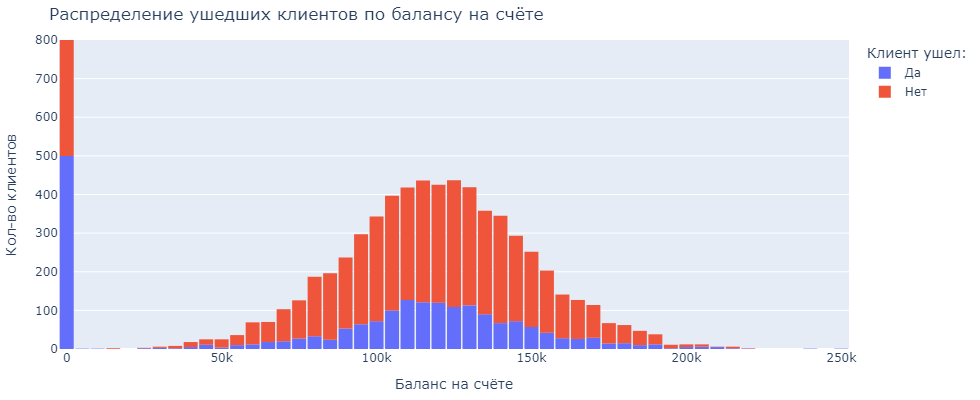

In [843]:
plots_histogram(df, "balance", 'Распределение ушедших клиентов по балансу на счёте',"Баланс на счёте", "Кол-во клиентов",
                color="churn_str", labels={'churn_str': 'Клиент ушел:'}, range_y=[0, 800])

`Вывод:` из тех клиентов, у которых на счёте есть деньги ушедшие распределены равномерно, без перекосов.

Изучим как кредитный рейтинг связан с вероятностью оттока клиентов:

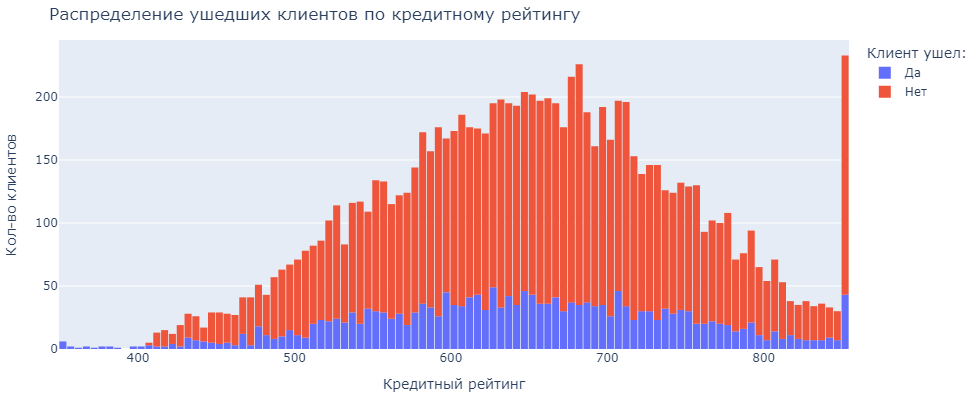

In [844]:
plots_histogram(df, "credit_score", 'Распределение ушедших клиентов по кредитному рейтингу',"Кредитный рейтинг", "Кол-во клиентов",
                color="churn_str", labels={'churn_str': 'Клиент ушел:'})

`Вывод:` мы видим, что ушедшие клиенты по кредитному рейтингу распределены равномерно.

Изучим как предполагаемая зарплата связана с оттоком клиентов:

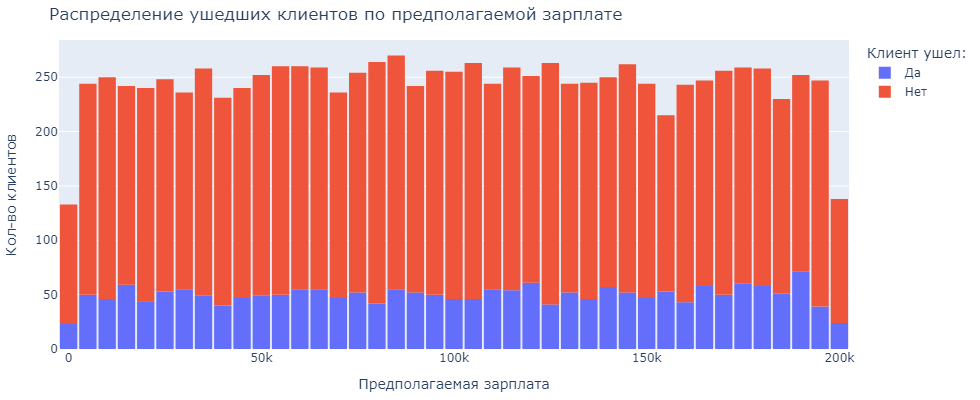

In [845]:
plots_histogram(df, "estimated_salary", 'Распределение ушедших клиентов по предполагаемой зарплате',
                "Предполагаемая зарплата", "Кол-во клиентов",
                color="churn_str", labels={'churn_str': 'Клиент ушел:'})

`Вывод:` мы видим, что ушедшие клиенты в зависимости от предполагаемой зарплаты распределены равномерно.

---
## Продукты и активность

Изучим как количество используемых продуктов связано с оттоком клиентов:

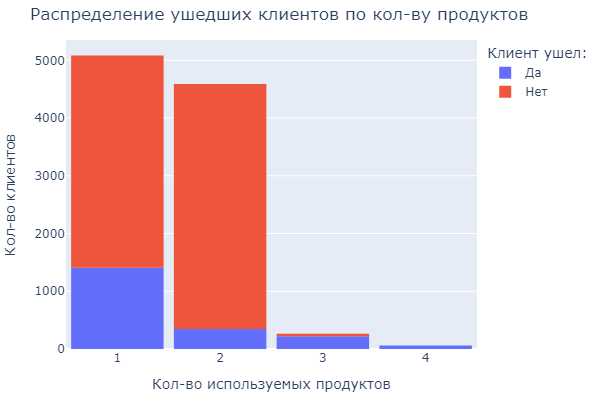

In [846]:
plots_histogram(df, "products_number", 'Распределение ушедших клиентов по кол-ву продуктов', "Кол-во используемых продуктов",
                "Кол-во клиентов", color="churn_str", labels={'churn_str': 'Клиент ушел:'}, width=600)

`Вывод:` мы видим, что ушли большая часть или все клиенты, кто использовал по 3-4 продукта банка. Также большой % клиентов ушёл при использовании 1 продукта и меньше всего, кто использовал 2 продукта.

Изучим как использование кредитной карты связано с оттоком клиентов:

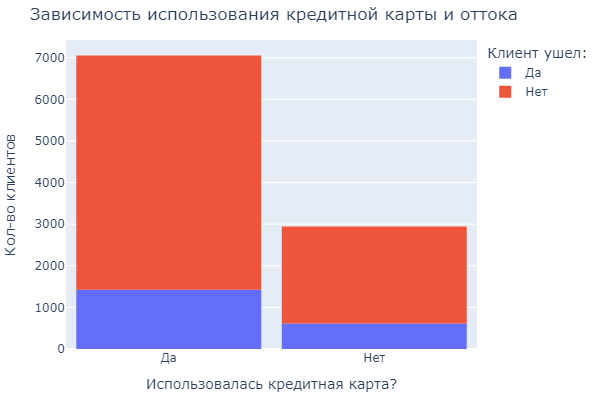

In [847]:
plots_histogram(df, "credit_card_str", 'Зависимость использования кредитной карты и оттока',
                "Использовалась кредитная карта?", "Кол-во клиентов",
                color="churn_str", labels={'churn_str': 'Клиент ушел:'}, width=600)

`Вывод:` мы видим, что ушедшие клиенты есть примерно в равной доле среди тех, кто использовал и не использовал кредитную карту.

Изучим как активность клиента связана с оттоком клиентов:

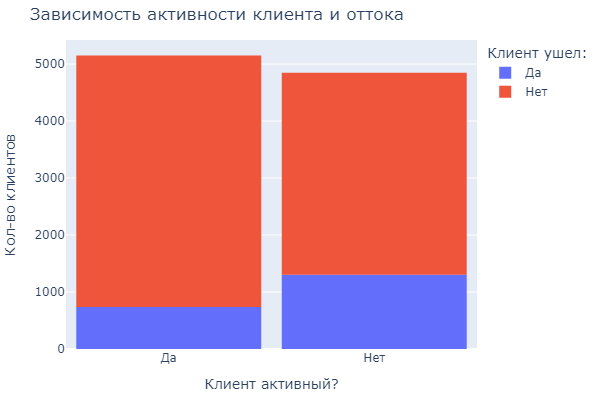

In [848]:
plots_histogram(df, "active_member_str", 'Зависимость активности клиента и оттока',
                "Клиент активный?", "Кол-во клиентов",
                color="churn_str", labels={'churn_str': 'Клиент ушел:'}, width=600)

`Вывод:` на графике мы чётко видим, что среди не активных клиентов процент ушедших ощутимо больше.

---
## Демография и поведение

Изучим как возраст клиентов связан с их оттоком:

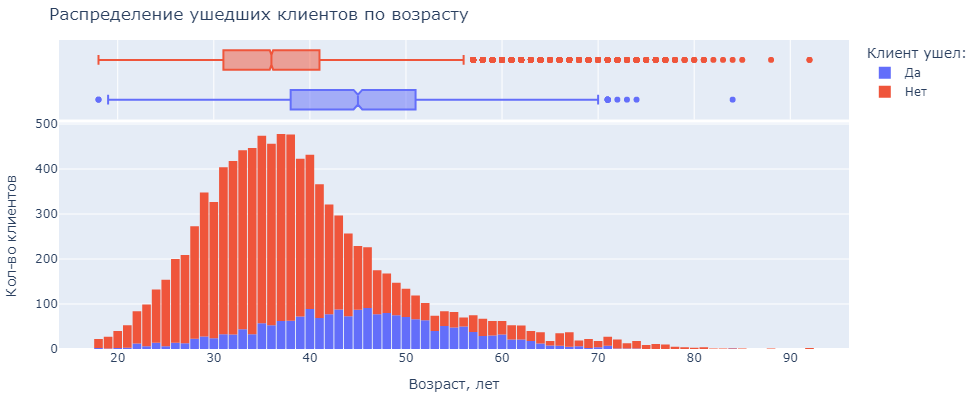

In [849]:
plots_histogram(df, "age", 'Распределение ушедших клиентов по возрасту',"Возраст, лет", "Кол-во клиентов",
                color="churn_str", marginal="box", labels={'churn_str': 'Клиент ушел:'})

`Вывод:` анализ показывает, что наибольшее кол-во ушедших клиентов в диапазоне возраста 40-50 лет, в то время как например больше всего клиентов с возрастом в диапазоне 30-40 лет.

Изучим как срок сотрудничества с банком связан с оттоком:

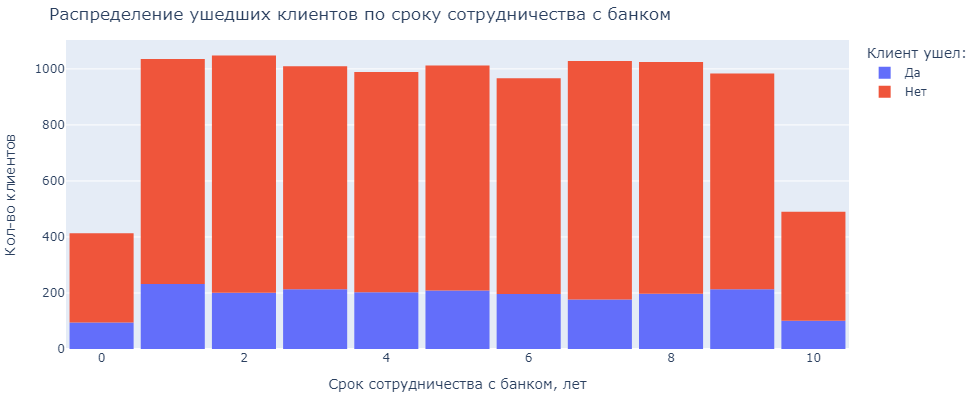

In [850]:
plots_histogram(df, "tenure", 'Распределение ушедших клиентов по сроку сотрудничества с банком',
                "Срок сотрудничества с банком, лет", "Кол-во клиентов",
                color="churn_str", labels={'churn_str': 'Клиент ушел:'})

`Вывод:` мы видим, что клиенты уходят на разном сроке сотрудничества с банком примерно в одинаковом проценте случаев.

---
## Корреляции и взаимодействия

Изучим как страна клиента связана с оттоком клиентов:

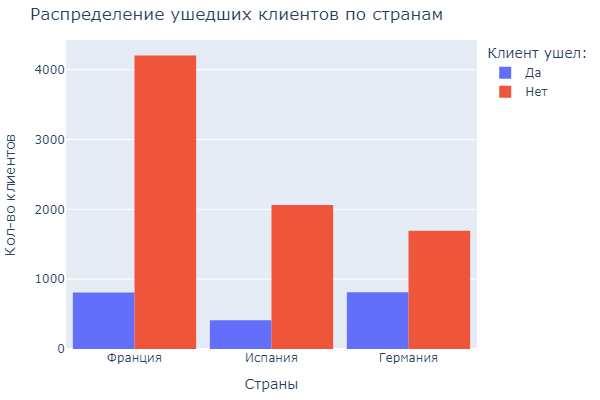

In [851]:
plots_histogram(df, "country", 'Распределение ушедших клиентов по странам',"Страны", "Кол-во клиентов",
                color="churn_str", barmode="group", width=600, labels={'churn_str': 'Клиент ушел:'})

`Вывод:` ушедшие клиенты есть в каждой стране и в Германии их удельный вес выше, чем в других странах.

Построим матрицу корреляций признаков с полем оттока и на основе построим тепловую карту:

In [852]:
# Выбор только числовых столбцов
numeric_df = df.select_dtypes(include=['number'])

# Расчет корреляции
correlation = numeric_df.corr()

# Корреляция с целевой переменной 'churn'
churn_corr = correlation['churn'].sort_values(ascending=False)

# Накладываем на поле тепловую карту для наглядности
data_styled = highlight_cells(df=churn_corr, col_heatmap=['churn',], decimal_places=3)

print("Корреляция числовых признаков с оттоком клиентов:")
data_styled

Корреляция числовых признаков с оттоком клиентов:


,churn
churn,1.000
age,0.285
balance,0.119
estimated_salary,0.012
customer_id,-0.006
credit_card,-0.007
tenure,-0.014
credit_score,-0.027
products_number,-0.048
active_member,-0.156


`Вывод:` анализ корреляции числовых признаков показал следующее: признак "возраст" имеет низкую корреляцию 0.285 и признак "баланс на счёте" ещё ниже 0.119. Остальные признаки имеют также не значительные корреляции и уходящие в отрицательные. Можно выделить значение с наибольшей отрицательной корреляцией поля "активность пользователя" равную -0.156.

В итоге можно сделать следующие выводы:
1. с увеличением возраста клиенты немного более склонны к оттоку.
2. более активные клиенты чаще остаются с банком, что предсказуемо.

---
## Корреляция сложных признаков с оттоком клиентов

### Взаимосвязь оттока клиентов с отношением возраста клиента к его балансу на счёте

Изучим данную связь и для этого создадим поле "age_balance_ratio" с данным новым признаком. Возраст делим на баланс на счёте.

После этого построим график распределения, показывающий взаимосвязь. На оси x на графике слева расположены молодые клиенты и с большими суммами на счету, а справа клиенты в возрасте и с меньшими суммами на счету. Слева на право возраст увеличивается, а баланс на счёте уменьшается.

Коэффициент корреляции между 'Возраст / Баланс' и 'Отток клиентов' равен: -0.07


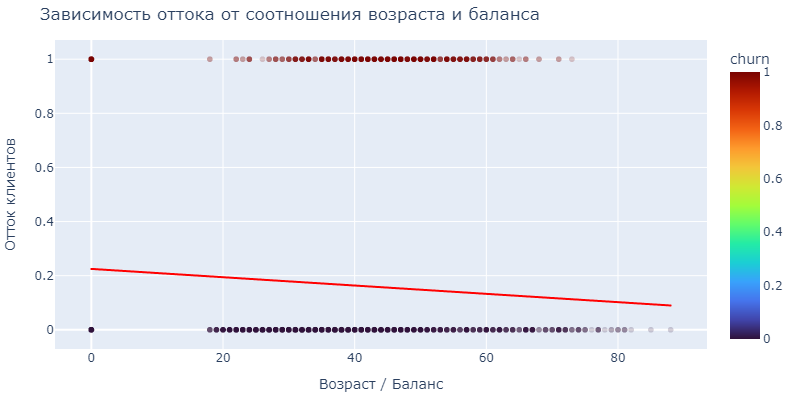

In [853]:
df['age_balance_ratio'] = df['age'] / (df['balance'] + 1)  # +1 для избежания деления на 0

plot_scatter(df, 'age_balance_ratio', 'Возраст / Баланс', 'churn', 'Отток клиентов',
             'Зависимость оттока от соотношения возраста и баланса', color='churn')

`Вывод:` анализ показывает, что с ростом отношения "Возраст / Баланс" отток клиентов снижается. Корреляция -0.07. График говорит о том, что клиенты с большим возрастом и меньшим балансом реже уходят из банка и более лояльны.

Клиенты с маленьким балансом и/или старшие клиенты более лояльны. Они реже уходят из банка, возможно, потому что:
- У них меньше альтернатив для перехода в другие банки.
- Они менее склонны к риску и предпочитают оставаться в привычном банке.
- Их баланс настолько мал, что они не видят смысла менять банк.

Клиенты с большим балансом и/или молодые клиенты чаще уходят. Это может быть связано с тем, что:
- У них больше финансовых возможностей и они активнее ищут выгодные условия в других банках.
- Они более мобильны и открыты к изменениям.
- Их большой баланс делает их привлекательными для других банков, которые предлагают более выгодные условия.

`Практические выводы для банка:`

Для клиентов с высоким "Возраст / Баланс":
- Эти клиенты уже лояльны, но их баланс мал. Банк может предложить им продукты, которые помогут увеличить их баланс (например, выгодные депозиты или инвестиционные продукты).
- Удержание таких клиентов не требует больших усилий, но важно поддерживать их доверие.

Для клиентов с низким "Возраст / Баланс". Это группа риска. Банк должен активно работать над удержанием таких клиентов:
- Предлагать персонализированные условия (например, снижение комиссий или повышенные проценты на остаток).
- Улучшать сервис и коммуникацию, чтобы повысить их лояльность.
- Проводить акции или программы лояльности для этой группы.

### Взаимосвязь оттока клиентов с отношением возраста клиента к сроку сотрудничества с банком

Изучим данную связь и для этого создадим поле "age_tenure_ratio" с данным новым признаком. Возраст делим на срок сотрудничества клиента с банком.

После этого построим график распределения, показывающий взаимосвязь. На оси x на графике слева расположены клиенты, которые начали сотрудничать с банком в молодом, а справа в более зрелом возрасте.

Коэффициент корреляции между 'Возраст / Срок сотрудничества' и 'Отток клиентов' равен: 0.11


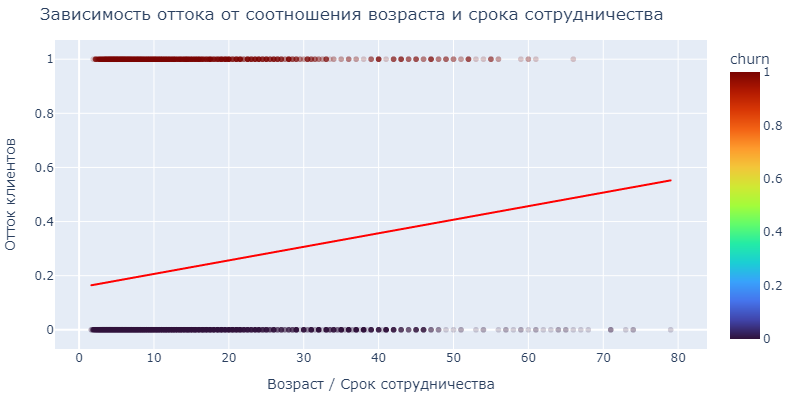

In [854]:
df['age_tenure_ratio'] = df['age'] / (df['tenure'] + 1)  # +1 для избежания деления на 0

plot_scatter(df, 'age_tenure_ratio', 'Возраст / Срок сотрудничества', 'churn', 'Отток клиентов',
             'Зависимость оттока от соотношения возраста и срока сотрудничества', color='churn')

`Вывод:` анализ показывает, что с ростом отношения "Возраст / Срок сотрудничества" отток клиентов увеличивается. Корреляция 0.11. График говорит о том, что клиенты, которые начали сотрудничать с банком в более раннем возрасте меньше уходят от сотрудничества с банком, чем те, кто пришёл в банк в более зрелом возрасте.

### Взаимосвязь оттока клиентов с отношением баланса на счёте к предполагаемой зарплате

Изучим данную связь и для этого создадим поле "balance_estimated_salary_ratio" с данным новым признаком. Баланс на счёте делим на предполагаемый размер зарплаты.

После этого построим график распределения, показывающий взаимосвязь. На оси x на графике слева расположены клиенты, которые тратят большую часть своих доходов и/или хранят деньги в других местах. Справа на оси расположены клиенты, которые хранят большую часть своих доходов на счёте.

Коэффициент корреляции между 'Баланс на счёте / Предполагаемая зарплата' и 'Отток клиентов' равен: 0.03


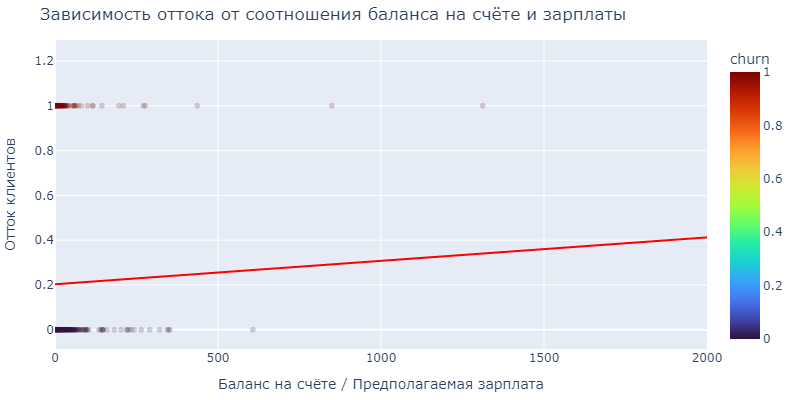

In [855]:
df['balance_estimated_salary_ratio'] = df['balance'] / (df['estimated_salary'] + 1)  # +1 для избежания деления на 0

plot_scatter(df, 'balance_estimated_salary_ratio', 'Баланс на счёте / Предполагаемая зарплата', 'churn', 'Отток клиентов',
             'Зависимость оттока от соотношения баланса на счёте и зарплаты', x_range=[0, 2000], color='churn')

`Вывод:` анализ показывает, что с ростом отношения "Баланс на счёте / Предполагаемая зарплата" отток клиентов увеличивается. Корреляция 0.03. График говорит о том, что клиенты, которые тратят большую часть своей зарплаты уходят реже, а те, кто большую часть своей зарплаты хранит на счёте уходят чаще.

### Взаимосвязь оттока клиентов с отношением кредитного рейтинга к балансу на счете

Изучим данную связь и для этого создадим поле "credit_score_balance_ratio" с данным новым признаком. Кредитный рейтинг делим на баланс на счёте.

После этого построим график распределения, показывающий взаимосвязь. На оси x на графике слева расположены клиенты с низким кредитным рейтингом и большим балансом, а справа высоким кредитным рейтингом и меньшим балансом. Слева на право кредитный рейтинг увеличивается, а баланс на счёте снижается.

Коэффициент корреляции между 'Кредитный рейтинг / Баланс на счёте' и 'Отток клиентов' равен: -0.12


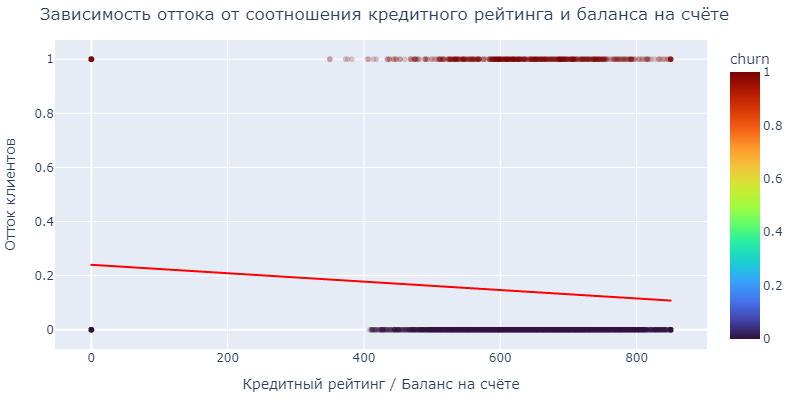

In [856]:
df['credit_score_balance_ratio'] = df['credit_score'] / (df['balance'] + 1)  # +1 для избежания деления на 0

plot_scatter(df, 'credit_score_balance_ratio', 'Кредитный рейтинг / Баланс на счёте', 'churn', 'Отток клиентов',
             'Зависимость оттока от соотношения кредитного рейтинга и баланса на счёте', color='churn')

`Вывод:` анализ показывает, что с ростом отношения "Кредитный рейтинг / Баланс на счёте" отток клиентов снижается. Корреляция -0.12. График говорит о том, что клиенты с высоким балансом и низким кредитным рейтингом уходят чаще, а те, у кого высокий кредитный рейтинг и низкий баланс уходят реже.

### Взаимосвязь оттока клиентов с отношением предполагаемой зарплаты к возрасту клиента

Изучим данную связь и для этого создадим поле "estimated_salary_age_ratio" с данным новым признаком. Предполагаемую зарплату делим на возраст клиента.

После этого построим график распределения, показывающий взаимосвязь. На оси x на графике слева расположены клиенты с низкой зарплатой относительно их возраста, а справа с высокой зарплатой относительно их возраста. Слева на право зарплата увеличивается, а возраст снижается.

Коэффициент корреляции между 'Предполагаемая зарплата / Возраст' и 'Отток клиентов' равен: -0.10


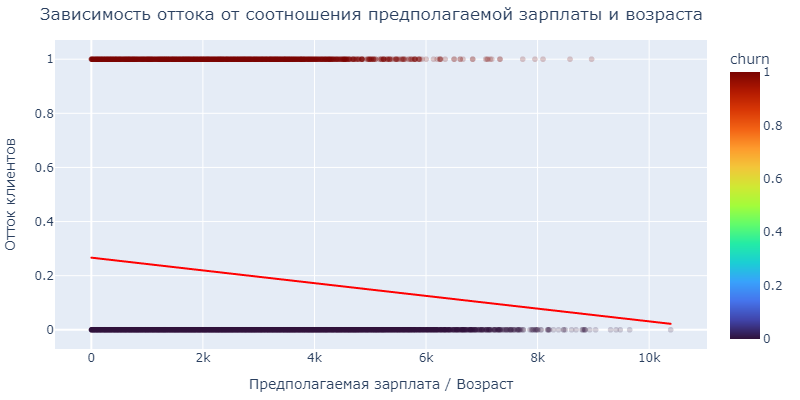

In [857]:
df['estimated_salary_age_ratio'] = df['estimated_salary'] / (df['age'] + 1)  # +1 для избежания деления на 0

plot_scatter(df, 'estimated_salary_age_ratio', 'Предполагаемая зарплата / Возраст', 'churn', 'Отток клиентов',
             'Зависимость оттока от соотношения предполагаемой зарплаты и возраста', color='churn')

`Вывод:` анализ показывает, что с ростом отношения "Предполагаемая зарплата / Возраст" отток клиентов снижается. Корреляция -0.10. График говорит о том, что клиенты с низкой зарплатой относительно их возраста уходят чаще, а клиенты с высокой зарплатой относительно их возраста реже.

### Взаимосвязь оттока клиентов с отношением кредитного рейтинга к предполагаемой зарплате

Изучим данную связь и для этого создадим поле "credit_score_estimated_salary_ratio" с данным новым признаком. Кредитный рейтинг делим на предполагаемую зарплату.

После этого построим график распределения, показывающий взаимосвязь. На оси x на графике слева расположены клиенты с низким рейтингом и высокой зарплатой, а справа с высоким рейтингом и низкой зарплатой. Слева на право рейтинг увеличивается, а зарплата снижается.

Коэффициент корреляции между 'Кредитный рейтинг / Предполагаемая зарплата' и 'Отток клиентов' равен: 0.02


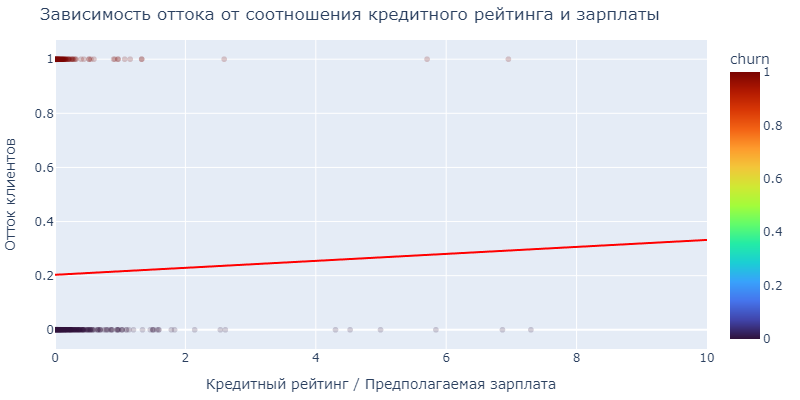

In [858]:
df['credit_score_estimated_salary_ratio'] = df['credit_score'] / (df['estimated_salary'] + 1)  # +1 для избежания деления на 0

plot_scatter(df, 'credit_score_estimated_salary_ratio', 'Кредитный рейтинг / Предполагаемая зарплата', 'churn', 'Отток клиентов',
             'Зависимость оттока от соотношения кредитного рейтинга и зарплаты', x_range=[0, 10], color='churn')

`Вывод:` анализ показывает, что с ростом отношения "Кредитный рейтинг / Предполагаемая зарплата" отток клиентов увеличивается. Корреляция 0.02. График говорит о том, что клиенты с низким кредитным рейтингом и высокой зарплатой уходят реже, а клиенты с высоким кредитным рейтингом и низкой зарплатой чаще.

In [859]:
# Включаем интерактивный режим для Jupyter Notebook
pyo.init_notebook_mode(connected=True)

fig = px.scatter_3d(df, x='age', y='tenure', z='balance', color='churn')

fig.update_layout(width=1000, height=1000,
                  margin={"r": 0, "t": 30, "l": 0, "b": 0})

pyo.iplot(fig)

# Устанавливаем рендерер по умолчанию на "png" (статический)
pio.renderers.default = "png"

## Показатели на карте

Сделаем для карты по странам сводную таблицу с вычислением значений:

In [860]:
# вычислим показатели
agg_country = df.groupby(['country',]).agg(
	customer_count = ('customer_id', 'count'),
    balance_median = ('balance', lambda x: round(x.median(), 0)),
    churn_mean = ('churn', lambda x: round(x.mean()*100, 1)),
	).reset_index()

# выведем сводную таблицу
agg_country

,country,customer_count,balance_median,churn_mean
0,Германия,2509,119703.0,32.4
1,Испания,2477,61710.0,16.7
2,Франция,5014,62154.0,16.2


Определим df с данными для корректного нанесения на карту и соединим его с сводной таблицей:

In [861]:
# Создаем DataFrame с данными для нанесения на карту
data_geo = {
    "country": ["Франция", "Испания", "Германия"],
    "iso_alpha": ["FRA", "ESP", "DEU"],  # Коды стран для подсветки контуров
    "lat": [46.0, 40.0, 51.0],  # Широта для точек
    "lon": [2.0, -4.0, 10.0]}   # Долгота для точек

df_for_geo = pd.DataFrame(data_geo)

# соединим df по полю "country"
df_geo = pd.merge(df_for_geo, agg_country, on='country', how='inner')

# выведем соединенный df
df_geo

,country,iso_alpha,lat,lon,customer_count,balance_median,churn_mean
0,Франция,FRA,46.0,2.0,5014,62154.0,16.2
1,Испания,ESP,40.0,-4.0,2477,61710.0,16.7
2,Германия,DEU,51.0,10.0,2509,119703.0,32.4


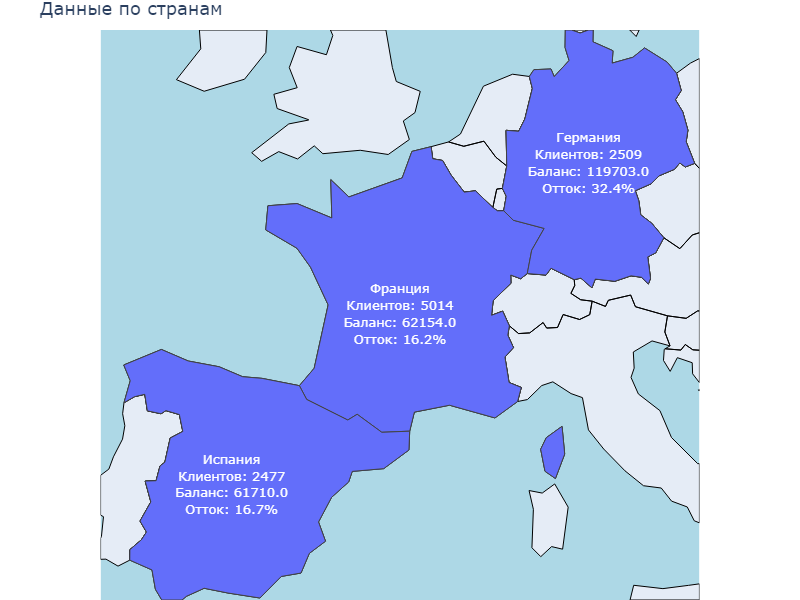

In [862]:
# Создаем карту с подсветкой контуров стран
fig = px.choropleth(df_geo, locations="iso_alpha", scope="europe", title="Данные по странам")

# Создаем составные метки
df_geo["label"] = (
    df_geo["country"] + "<br>" +
    "Клиентов: " + df_geo["customer_count"].astype(str) + "<br>" +
    "Баланс: " + df_geo["balance_median"].astype(str) + "<br>" +
    "Отток: " + df_geo["churn_mean"].astype(str) + "%")

# Добавляем точки на карту
fig.add_trace(px.scatter_geo(df_geo, lat="lat", lon="lon", text="label", size_max=10).data[0])

# Настраиваем карту
fig.update_geos(center=dict(lat=46, lon=2), projection_scale=4, visible=True,
                showcountries=True, countrycolor="black")

# Настраиваем layout
fig.update_layout(width=800, height=600, margin={"r": 0, "t": 30, "l": 0, "b": 0},
                  geo=dict(bgcolor="lightblue"), font=dict(size=13), showlegend=False)

# Задаем белый цвет для подписей точек
fig.update_traces(selector=dict(type="scattergeo"), # Выбираем только точки
                  textfont=dict(color="white"))     # Цвет текста подписи

pyo.iplot(fig)